### Radial Velocity  

Example script fitting a power-law in period and M sin i to radial velocity data

In [2]:
import EPOS
import numpy as np
import matplotlib.pyplot as plt

initialize the EPOS class for use with a radial velocity survey (RV).

In [3]:
epos= EPOS.epos(name='radial_velocity', RV=True, MC=False, Msini=True)


 |~| epos 3.0.0.dev4 |~|


Using random seed 1885962102
Survey: None selected


load the exoplanets and completeness from Mayor+ 2011, Fernandes+ 2018

In [6]:
obs, survey= EPOS.rv.Mayor2011()
epos.set_observation(**obs, Verbose=False)
epos.set_survey(**survey)

Define a double broken power-law as a planet population

In [7]:
epos.set_parametric(EPOS.fitfunctions.brokenpowerlaw2D)

Parameter initial guess and fitting ranges.

Note: 
	- brokenpowerlaw2D uses 6 parameters, indicated with the is2D keyword
	- 'pps' is a normalization factor for the planet occurrence rate (planets-per-star)
	- parameters a_M and b_M are not fitted
	- dx is the range in walker initial positions for parameters that change sign (+/-)

In [8]:
epos.fitpars.add('pps', 1.0, min=1e-3)
epos.fitpars.add('P break', 1e3, min=100, max=7e3, is2D=True)
epos.fitpars.add('a_P', 1.0, min=0, max=3, is2D=True)
epos.fitpars.add('b_P', -0.5, min=-3, max=0, is2D=True)
epos.fitpars.add('M break', 10.0, fixed=True, is2D=True) 
epos.fitpars.add('a_M', 0.0, fixed=True, is2D=True)
epos.fitpars.add('b_M', -0.5, dx=0.1, is2D=True)

define the simulated range (trim) and the range compared to observations (zoom)
Units are period (days) and planet mass (erath mass)

In [11]:
epos.set_ranges(xtrim=[1,1e5],ytrim=[1,1e5],xzoom=[10,1e4],yzoom=[50,1e4], Occ=True)

Ranges already defined


Run epos once


Starting the first noMC run
Finished one noMC in 0.010 sec


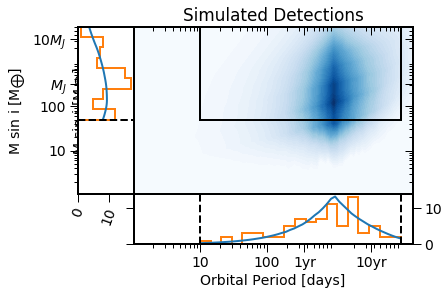

In [14]:
EPOS.run.once(epos)
EPOS.plot.periodradius.panels(epos, NB=True)

calculate the occurrence rates for comparison 


Interpolating planet occurrence

  x zoom bins
  x: [10,1e+04], y: [1,1.7], n=0, comp=nan, occ=0
  x: [10,1e+04], y: [1.7,2.6], n=1, comp=0.0027, occ=0.45
  x: [10,1e+04], y: [2.6,4.1], n=3, comp=0.024, occ=0.17
  x: [10,1e+04], y: [4.1,6.5], n=6, comp=0.079, occ=0.13
  x: [10,1e+04], y: [6.5,10], n=7, comp=0.16, occ=0.061
  x: [10,1e+04], y: [10,16], n=17, comp=0.19, occ=0.11
  x: [10,1e+04], y: [16,26], n=14, comp=0.2, occ=0.097
  x: [10,1e+04], y: [26,40], n=4, comp=0.23, occ=0.021
  x: [10,1e+04], y: [40,64], n=7, comp=0.34, occ=0.028
  x: [10,1e+04], y: [64,1e+02], n=9, comp=0.36, occ=0.034
  x: [10,1e+04], y: [1e+02,1.6e+02], n=4, comp=0.55, occ=0.009
  x: [10,1e+04], y: [1.6e+02,2.5e+02], n=8, comp=0.5, occ=0.02
  x: [10,1e+04], y: [2.5e+02,4e+02], n=14, comp=0.61, occ=0.029
  x: [10,1e+04], y: [4e+02,6.2e+02], n=13, comp=0.71, occ=0.022
  x: [10,1e+04], y: [6.2e+02,9.9e+02], n=10, comp=0.76, occ=0.017
  x: [10,1e+04], y: [9.9e+02,1.6e+03], n=6, comp=0.86, occ=0.0086
  x: [10,1

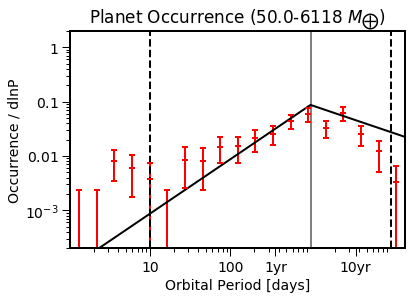

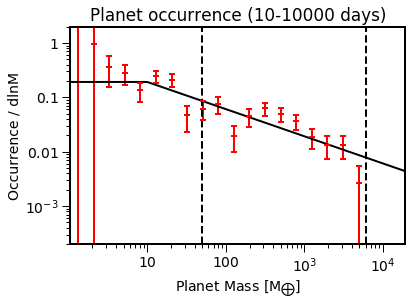

In [19]:
EPOS.occurrence.all(epos)
epos.plotpars['occrange']= [2e-4,2.]
EPOS.plot.parametric.oneD_x(epos, Occ=True, NB=True)
EPOS.plot.parametric.oneD_y(epos, Occ=True, NB=True)

run an MCMC chain on multiple cores or read in a previously saved run


Loading saved status from chain/radial_velocity/100x1000x5.npz

MC-ing the 30 samples to plot

Best-fit values
  pps= 0.94 +0.237 -0.184
  P break= 1.99e+03 +1.12e+03 -1.11e+03
  a_P= 0.706 +0.324 -0.155
  b_P= -1.06 +0.786 -1.29
  b_M= -0.462 +0.0569 -0.0635

Starting the best-fit MC run
nobs=80 (x:88,y:73)

Goodness-of-fit
  logp= -0.8
  - p(n=80)=0.99
  - p(x)=0.88
  - p(y)=0.51

  Akaike/Bayesian Information Criterion
  - k=5, n=79
  - BIC= 23.5
  - AIC= 11.6, AICc= 9.5

Observation comparison in 0.003 sec


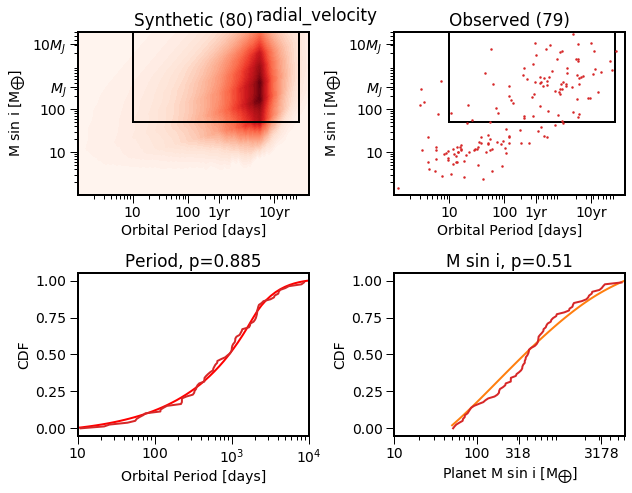

In [16]:
EPOS.run.mcmc(epos, nMC=1000, nwalkers=100, nburn=200, threads=20, Saved=True)
EPOS.plot.periodradius.cdf(epos, NB=True)

plot the posterior distributions, and compare them with occurrence rates

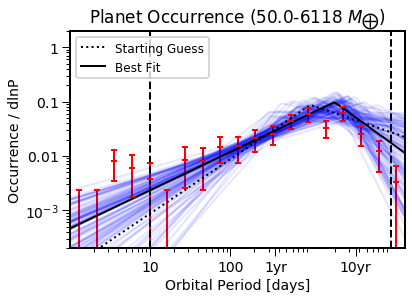

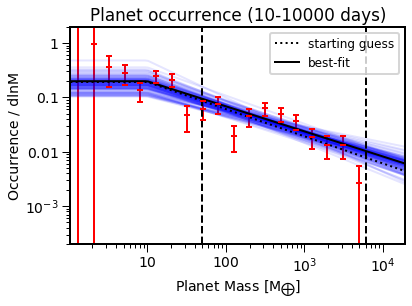

In [20]:
EPOS.plot.parametric.oneD_x(epos, MCMC=True, NB=True, Occ=True)
EPOS.plot.parametric.oneD_y(epos, MCMC=True, NB=True, Occ=True)